**Q-1.** Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted.                                                                                             
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd

# Load the preprocessed dataset
data = pd.read_csv('instagram_reach.csv')
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [2]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


**Data Cleaning**

In [4]:
#because there is only 6 main features (columns), "Unnamed:0" and "S.No" columns will removed
df = data.copy()
df.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)

In [5]:
#handling null values
df=df.dropna()

In [6]:
# #Times since posted will be better if in type of int/float, So changing the data type
df['Time since posted (hours)'] = df['Time since posted'].str.replace(' hours', '')
df['Time since posted (hours)'] = df['Time since posted (hours)'] .astype(int) 
df['Time since posted (hours)']

0     11
1      2
2      2
3      3
4      3
      ..
95     3
96     3
97     3
98     3
99     3
Name: Time since posted (hours), Length: 94, dtype: int32

In [7]:
# deleting the exist Time since posted column
df = df.drop('Time since posted', axis=1)
df

,USERNAME,Caption,Followers,Hashtags,Likes,Time since posted (hours)
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,31,3
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,42,3
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,10,3
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,222,3


**EDA**

C:\Users\pallabi.sahoo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


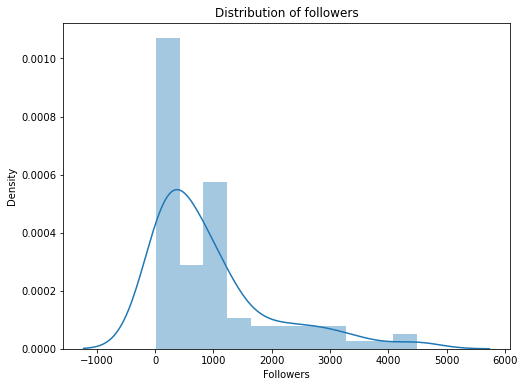

In [8]:
#Distribution of followers variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(df['Followers'])
plt.title("Distribution of followers")
plt.show()

The followers distribution in right skewed. Most of the account has followers between 0-300 or more

C:\Users\pallabi.sahoo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


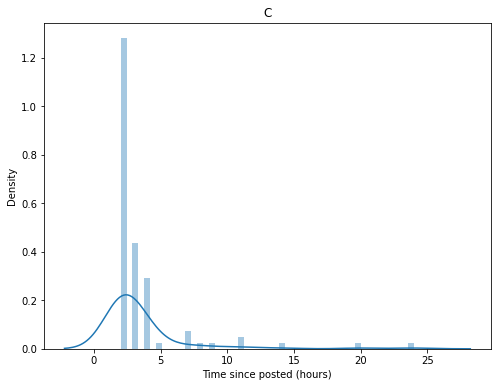

In [9]:
# Distribution of Times since posted (hours)
plt.figure(figsize=(8,6))
sns.distplot(df['Time since posted (hours)'])
plt.title('C')
plt.show()

The Time_since_posted_hours distribution is right skewed

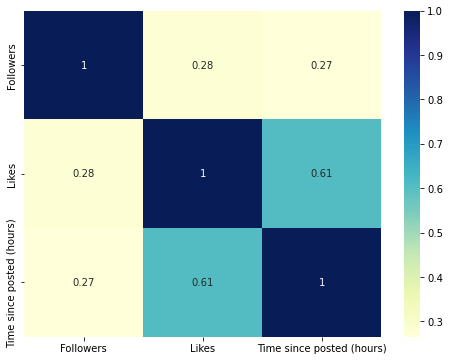

In [10]:
# corelationship between data
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is strong correlation between likes and times since posted in hours

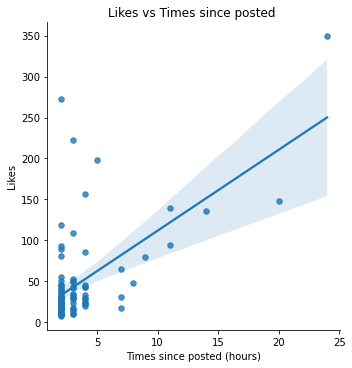

In [11]:
#relationship between time since posted and likes
sns.lmplot(x='Time since posted (hours)', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})
plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

There is linear relationship between times since posted and likes. Some data shows no relationship between these two

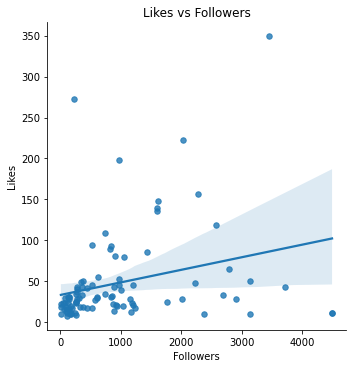

In [12]:
#relationship between followers and likes
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

There is linear relationship between these two variables

In [21]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   USERNAME                   94 non-null     object
 1   Caption                    94 non-null     object
 2   Followers                  94 non-null     int64 
 3   Hashtags                   94 non-null     object
 4   Likes                      94 non-null     int64 
 5   Time since posted (hours)  94 non-null     int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 4.8+ KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Split the dataset into input features (X) and target variables (y)
X = df[['Caption', 'Followers', 'Hashtags']]
y = df[['Likes', 'Time since posted (hours)']]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for text variables (TF-IDF vectorization)
text_features = ['Caption', 'Hashtags']
text_transformer = TfidfVectorizer()

# Preprocessing for numerical variables (none needed in this case)

# Combine the preprocessed features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_features)
    ])

# Initialize and train the multi-output model
model = MultiOutputRegressor(RandomForestRegressor())
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Extract predictions for likes and time since posted
likes_predictions = predictions[:, 0]
time_predictions = predictions[:, 1]

# Evaluate the model for predicting likes
likes_mse = mean_squared_error(y_test['Likes'], likes_predictions)
likes_rmse = likes_mse ** 0.5
print("Likes RMSE:", likes_rmse)

# Evaluate the model for predicting time since posted
time_mse = mean_squared_error(y_test['Time since posted (hours)'], time_predictions)
time_rmse = time_mse ** 0.5
print("Time Since Posted RMSE (hours):", time_rmse)

ValueError: Found input variables with inconsistent numbers of samples: [2, 75]

In [27]:
import numpy as np
x = np.array(df['Followers'])
y = np.array(df[['Likes', 'Time since posted (hours)']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [28]:
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

ValueError: Expected 2D array, got 1D array instead:
array=[ 151  971 1200  845  828  610 2232  371  383   12  888  450 2372 1231
  273 3139  285  122  226 1433  361 1618 2691  140 1211 2785  533  166
  340  520  193   13  181  259  614  835  179 3147  741 3448  914 1766
  246 1180 2014  577  182  863  105 4496 3725  361  918  894   49  145
   89   91  124  279  880   87  334  255 4496  971  631  106  262  966
   11  740 2904 2039 2277].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

x = np.array(df['Followers'])
y = np.array(df[['Likes', 'Time since posted (hours)']])

x = x.reshape(-1, 1)  # Reshape x to have shape (n, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = MultiOutputRegressor(RandomForestRegressor())
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

print("Model Score:", score)

Model Score: 0.43628989020057624
